In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file (with header)
df = pd.read_csv('../omp_scaling_results/omp_thread_times.csv')

# Show the dataframe
df

,Thread,min,max,avg
0,1,57.894924,57.894924,57.894924
1,2,45.520235,45.642262,45.581248
2,4,14.163949,53.768825,28.943948
3,8,0.188618,57.466517,14.580411
4,16,0.121529,57.712419,7.376365
5,32,0.197896,58.073515,3.843904
6,56,0.358753,57.924209,2.362467
7,84,0.533196,57.990126,1.836090
8,112,0.629479,58.101253,1.660656


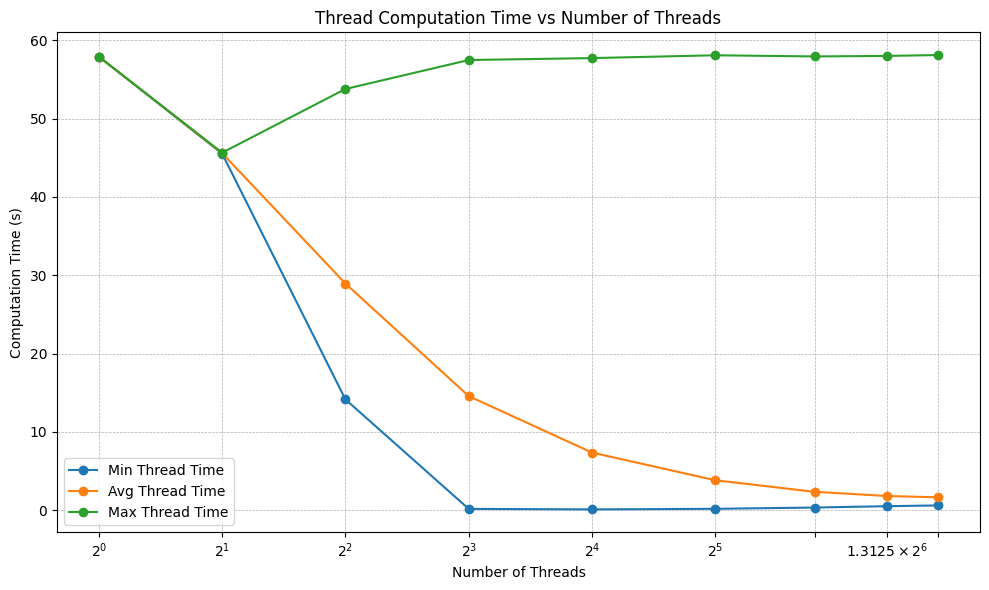

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df['Thread'], df['min'], marker='o', label='Min Thread Time')
plt.plot(df['Thread'], df['avg'], marker='o', label='Avg Thread Time')
plt.plot(df['Thread'], df['max'], marker='o', label='Max Thread Time')
plt.xlabel('Number of Threads')
plt.ylabel('Computation Time (s)')
plt.title('Thread Computation Time vs Number of Threads')
plt.xscale('log', base=2)
plt.xticks(df['Thread'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Use avg time for speedup/efficiency
base_time = df['avg'].iloc[0]  # avg time for 1 thread
df['Speedup'] = base_time / df['avg']
df['Efficiency'] = df['Speedup'] / df['Thread']
df

,Thread,min,max,avg,Speedup,Efficiency
0,1,57.894924,57.894924,57.894924,1.000000,1.000000
1,2,45.520235,45.642262,45.581248,1.270148,0.635074
2,4,14.163949,53.768825,28.943948,2.000243,0.500061
3,8,0.188618,57.466517,14.580411,3.970733,0.496342
4,16,0.121529,57.712419,7.376365,7.848707,0.490544
5,32,0.197896,58.073515,3.843904,15.061491,0.470672
6,56,0.358753,57.924209,2.362467,24.506130,0.437609
7,84,0.533196,57.990126,1.836090,31.531637,0.375377
8,112,0.629479,58.101253,1.660656,34.862683,0.311274


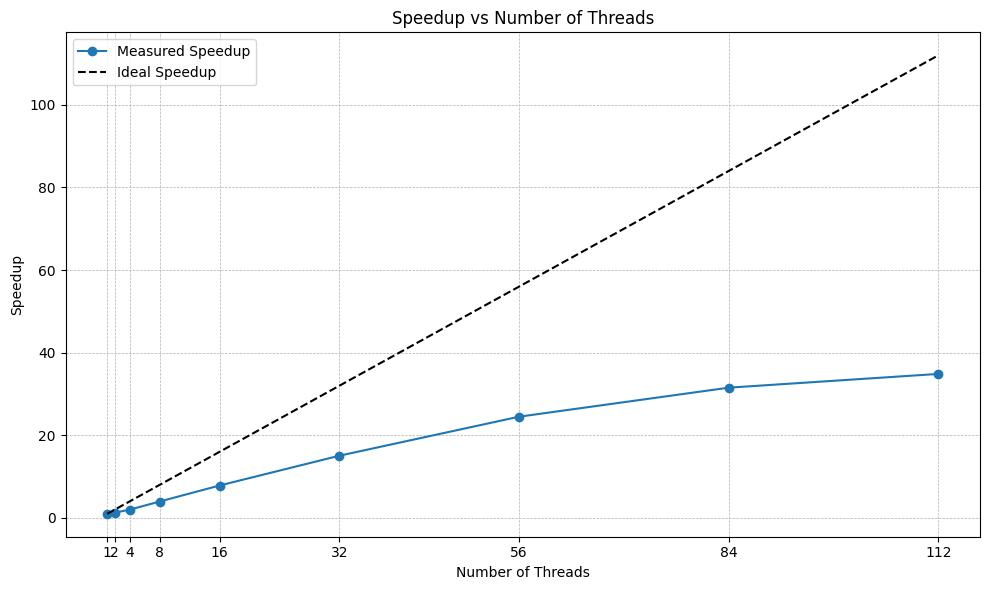

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df['Thread'], df['Speedup'], marker='o', label='Measured Speedup')
plt.plot(df['Thread'], df['Thread'], 'k--', label='Ideal Speedup')  # Ideal: speedup = threads
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Threads')
plt.xscale('linear')
plt.xticks(df['Thread'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

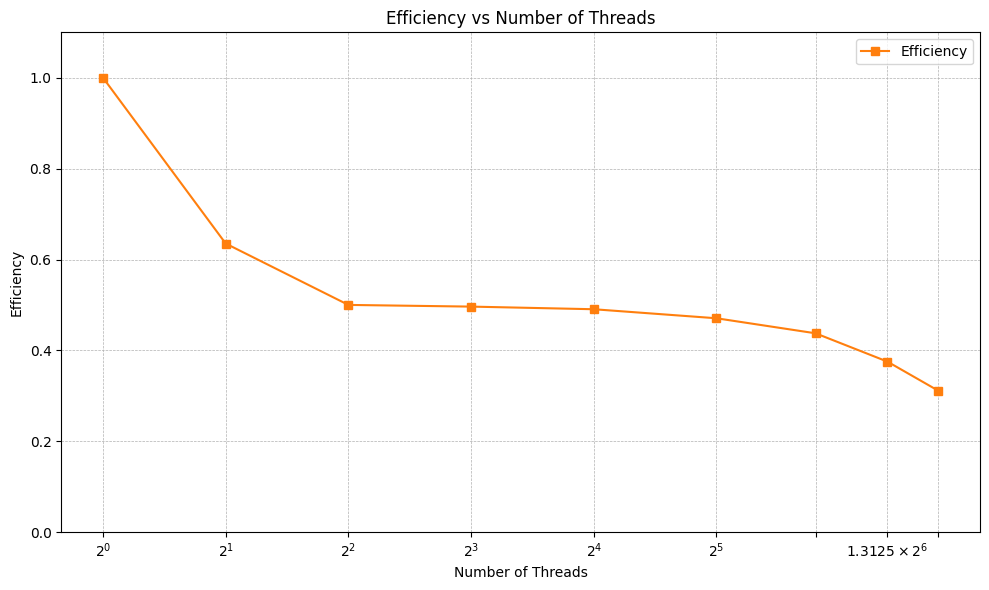

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['Thread'], df['Efficiency'], marker='s', color='tab:orange', label='Efficiency')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Number of Threads')
plt.xscale('log', base=2)
plt.xticks(df['Thread'])
plt.ylim(0, 1.1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()